### Data Loading and Exploration

In [422]:
## Q1
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eig
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [423]:
## Q2
df = pd.read_csv('sales_data_sample.csv', encoding='latin-1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [424]:
## Q3
df.shape

(2823, 25)

In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [426]:
## Q4
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

ORDERNUMBER          0.000000
QUANTITYORDERED      0.000000
PRICEEACH            0.000000
ORDERLINENUMBER      0.000000
SALES                0.000000
ORDERDATE            0.000000
STATUS               0.000000
QTR_ID               0.000000
MONTH_ID             0.000000
YEAR_ID              0.000000
PRODUCTLINE          0.000000
MSRP                 0.000000
PRODUCTCODE          0.000000
CUSTOMERNAME         0.000000
PHONE                0.000000
ADDRESSLINE1         0.000000
ADDRESSLINE2        89.302161
CITY                 0.000000
STATE               52.639036
POSTALCODE           2.692171
COUNTRY              0.000000
TERRITORY           38.044633
CONTACTLASTNAME      0.000000
CONTACTFIRSTNAME     0.000000
DEALSIZE             0.000000
dtype: float64

In [427]:
## Q5
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2818    False
2819    False
2820    False
2821    False
2822    False
Length: 2823, dtype: bool

In [432]:
## Q6
df1 = df['STATE'].value_counts().index[0]
df['STATE'].fillna(df1, inplace = True)
df['STATE'].head()

0    NY
1    CA
2    CA
3    CA
4    CA
Name: STATE, dtype: object

In [433]:
## Q6
df1 = df['POSTALCODE'].value_counts().index[0]
df['POSTALCODE'].fillna(df1, inplace = True)
df['POSTALCODE'].head()

0    10022
1    51100
2    75508
3    90003
4    28034
Name: POSTALCODE, dtype: object

In [434]:
## Q6
df1 = df['TERRITORY'].value_counts().index[0]
df['TERRITORY'].fillna(df1, inplace = True)
df['TERRITORY'].head()

0    EMEA
1    EMEA
2    EMEA
3    EMEA
4    EMEA
Name: TERRITORY, dtype: object

In [435]:
## Q7
df = df.drop(['ADDRESSLINE2','ORDERDATE', 'PHONE'], axis = 'columns')

In [436]:
## Q8
df['STATUS'] = df['STATUS'].map({'Shipped':1, 'Disputed':0, 'In Process':0, 'Cancelled':0, 'On Hold':0, 'Resolved':0})

In [437]:
## Q9
df = pd.get_dummies(df, columns=["STATUS", "PRODUCTLINE", "STATE", "COUNTRY", "TERRITORY", "DEALSIZE"], drop_first=True)

In [438]:
df = df.drop(['PRODUCTCODE', 'CUSTOMERNAME', 'ADDRESSLINE1', 'CITY', 'POSTALCODE', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME'], axis = 'columns')

In [439]:
## Q10
from sklearn.preprocessing import StandardScaler
df_std = StandardScaler().fit_transform(df.drop('STATUS_1', axis = 1))
df_scaled = pd.DataFrame(df_std, columns = df.drop('STATUS_1', axis = 1).columns)
print('Mean: \n', round(df_scaled.mean()))
print('\n')
print('Standard Deviation: \n', round(df_scaled.std()))

Mean: 
 ORDERNUMBER                    -0.0
QUANTITYORDERED                 0.0
PRICEEACH                      -0.0
ORDERLINENUMBER                 0.0
SALES                           0.0
QTR_ID                          0.0
MONTH_ID                       -0.0
YEAR_ID                        -0.0
MSRP                            0.0
PRODUCTLINE_Motorcycles        -0.0
PRODUCTLINE_Planes             -0.0
PRODUCTLINE_Ships              -0.0
PRODUCTLINE_Trains              0.0
PRODUCTLINE_Trucks and Buses    0.0
PRODUCTLINE_Vintage Cars        0.0
STATE_CA                       -0.0
STATE_CT                        0.0
STATE_Isle of Wight            -0.0
STATE_MA                       -0.0
STATE_NH                        0.0
STATE_NJ                        0.0
STATE_NSW                       0.0
STATE_NV                        0.0
STATE_NY                       -0.0
STATE_Osaka                     0.0
STATE_PA                       -0.0
STATE_Quebec                    0.0
STATE_Queensland    

In [440]:
covariance_mat = np.cov(df_scaled.T)
covariance_mat

array([[ 1.00035436,  0.06556638, -0.00293558, ..., -0.10192294,
        -0.00786511, -0.00707781],
       [ 0.06556638,  1.00035436,  0.005566  , ...,  0.01450851,
         0.28751923, -0.42784622],
       [-0.00293558,  0.005566  ,  1.00035436, ...,  0.00273531,
         0.56921326, -0.66093218],
       ...,
       [-0.10192294,  0.01450851,  0.00273531, ...,  1.00035436,
        -0.00462412,  0.00369185],
       [-0.00786511,  0.28751923,  0.56921326, ..., -0.00462412,
         1.00035436, -0.89481697],
       [-0.00707781, -0.42784622, -0.66093218, ...,  0.00369185,
        -0.89481697,  1.00035436]])

In [441]:
eigenvalue, eigenvector = np.linalg.eig(covariance_mat)
print('Eigenvalues: \n',eigenvalue,"\n")
print('Eigenvectors: \n',eigenvector,'\n')

Eigenvalues: 
 [ 3.69263292e+00  3.18435172e+00  2.75515028e+00  2.38080063e+00
  1.76087512e+00  1.72267385e+00  1.08493489e-02  1.97165296e-02
  2.85605777e-02  1.07093686e-01  1.25093263e-01  2.28325693e-01
  1.58671768e+00  3.59638765e-01  1.48363960e+00  4.23714521e-01
  4.64678490e-01  6.19113322e-01  1.36351889e+00  1.33569259e+00
  7.42945417e-01  1.26089270e+00  1.25267837e+00  7.71833951e-01
  1.19015889e+00  8.27790820e-01  1.16824791e+00  8.58302494e-01
  8.85026794e-01  1.13773121e+00  9.20104510e-01  1.10249101e+00
  9.44469104e-01  9.62391033e-01  1.07391541e+00  9.71148011e-01
  1.05592757e+00  9.92256275e-01  1.04514247e+00  1.03764227e+00
  1.03374028e+00  1.01065057e+00  1.01224462e+00  1.02700304e+00
  1.02486613e+00  1.02122471e+00  1.01823131e+00  1.01653230e+00
  1.66516711e-15 -6.53566780e-16 -3.56875003e-15 -2.24459227e-15] 

Eigenvectors: 
 [[-1.47075976e-02 -3.81389453e-03  2.40003432e-01 ... -5.02383274e-15
  -1.29928845e-15  4.27186659e-15]
 [-2.20138050e-0

In [442]:
eig_pairs = [(eigenvalue[index], eigenvector[:,index]) for index in range(len(eigenvalue))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalue))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalue))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(3.692632915392514, array([-1.47075976e-02, -2.20138050e-01, -4.19198047e-01,  3.13971766e-02,
       -4.49380929e-01, -1.18483648e-03, -3.43958535e-04, -1.09298069e-02,
       -3.77490229e-01, -3.55240204e-04,  5.03320945e-02,  3.60208911e-02,
        5.19325953e-02, -4.98191707e-02,  9.32735743e-02, -4.22582464e-03,
       -2.47562906e-02,  2.36547719e-02, -9.32743602e-03, -1.35913071e-02,
       -1.04604166e-02,  1.89486685e-02,  2.00407869e-02, -2.11257610e-02,
        2.68620919e-02, -1.18777633e-02, -4.57875152e-03, -6.92522141e-03,
        2.39573726e-02,  2.35432093e-02, -1.26004070e-02,  9.50818446e-03,
        9.99655643e-03, -1.49421051e-02, -4.96591228e-03,  3.91557117e-03,
       -3.01122853e-04,  3.10706952e-03,  3.02157294e-02,  3.56164878e-02,
       -6.43140118e-03,  5.60240133e-03,  6.81474872e-03,  2.66831218e-03,
       -1.29674004e-02, -2.64910315e-02,  1.98212419e-02, -3.71950775e-02,
       -4.03566478e-02,  2.40894782e-02, -4.08214473e-01,  4.82778148e-01])), (

In [443]:
tot = sum(eigenvalue)
var_explained = [(i / tot) for i in sorted(eigenvalue, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

### PCA for Dimension Reduction

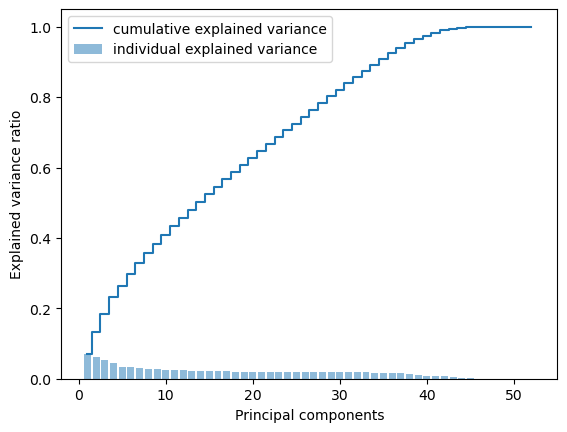

In [444]:
plt.bar(range(1,53), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,53),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [445]:
list_eigenvalue = eigenvalue.tolist()
list_eigenvalue.sort(reverse = True)
print(list_eigenvalue)

[3.692632915392514, 3.184351715901378, 2.7551502774788728, 2.3808006287543493, 1.76087512146354, 1.722673851751328, 1.5867176803596923, 1.4836396001582517, 1.3635188926520625, 1.3356925854709543, 1.260892699245553, 1.2526783728379973, 1.1901588885406054, 1.168247911460282, 1.1377312078223387, 1.1024910127331795, 1.0739154129240482, 1.0559275689098195, 1.0451424664938804, 1.037642274721974, 1.0337402772551816, 1.0270030430463877, 1.0248661260353753, 1.0212247091321454, 1.0182313093156412, 1.016532298931531, 1.0122446190195677, 1.0106505730200899, 0.9922562749492894, 0.9711480108348596, 0.9623910330867306, 0.9444691044218291, 0.9201045103469607, 0.8850267936542379, 0.8583024943557138, 0.8277908196131165, 0.771833950918103, 0.7429454170192092, 0.6191133217088665, 0.4646784902375632, 0.42371452128924664, 0.3596387654557074, 0.22832569291952123, 0.12509326347058128, 0.10709368645879373, 0.02856057769854693, 0.01971652962754801, 0.010849348872605117, 1.6651671091715258e-15, -6.53566779546607

In [446]:
percent_var = []
for i in list_eigenvalue:
    variation = i/sum(list_eigenvalue)*100
    percent_var.append(variation)
percent_var

[7.0987016589264496,
 6.121584063784903,
 5.2964890617219655,
 4.57684090461918,
 3.385098771608292,
 3.3116608147648754,
 3.05029925473109,
 2.8521423960098264,
 2.6212228637456874,
 2.567729690317878,
 2.4239347102584192,
 2.408143524448096,
 2.2879563363181474,
 2.2458347680733226,
 2.1871695880505184,
 2.1194239883464343,
 2.0644903779882715,
 2.0299106239022247,
 2.0091773893333125,
 1.9947590528797854,
 1.9872578697063419,
 1.974306239595701,
 1.9701982395104962,
 1.9631979952934093,
 1.957443496341003,
 1.9541773260748112,
 1.9459347086250438,
 1.9428703214411105,
 1.9075092018221842,
 1.8669307655358274,
 1.850096389118745,
 1.8156433504171783,
 1.7688049593988409,
 1.7013717074663197,
 1.649997029259533,
 1.5913415167635454,
 1.4837702726851456,
 1.428235079176686,
 1.190180790936007,
 0.8932959341197328,
 0.8145469761289501,
 0.6913680182811561,
 0.43893233154778655,
 0.24047875249596737,
 0.20587644294579951,
 0.054904731917286176,
 0.037902971885433165,
 0.02085674168130714

### In 35 components 90% of explained Variance is obtained

In [447]:
sum(percent_var[:35])

90.90830943943521

In [449]:
eig_vec_35 = eigenvector[:, 0:35]
eig_vec_35

array([[-0.0147076 , -0.00381389,  0.24000343, ...,  0.00069554,
         0.19525694, -0.07379129],
       [-0.22013805, -0.02258879,  0.05527717, ...,  0.05675991,
        -0.05673825,  0.1372719 ],
       [-0.41919805, -0.03284349, -0.01918952, ..., -0.03126882,
         0.03020186, -0.05392911],
       ...,
       [ 0.02408948, -0.47491987, -0.06787   , ..., -0.00782664,
         0.05231266, -0.06463385],
       [-0.40821447, -0.02015315, -0.00472347, ...,  0.01761194,
        -0.03583163, -0.00667977],
       [ 0.48277815,  0.02689072, -0.00406672, ..., -0.00388081,
         0.03024144, -0.00808568]])

In [450]:
new_data = np.dot(df_scaled, eig_vec_35)
df_pca = pd.DataFrame(new_data, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35
0,0.788683,0.392699,-1.387883,-1.836538,-2.405942,-1.494544,-0.173758,0.115547,0.056587,0.020765,...,0.949227,-0.895941,0.522304,-0.189733,0.138625,0.281300,1.168559,0.037866,-0.508233,-1.749276
1,1.208996,0.412712,0.668512,1.203511,-1.571449,-0.776021,-0.035851,0.082449,0.073829,-0.013227,...,0.247085,-0.230201,0.502631,0.219993,-0.469220,0.291517,0.363305,-0.547195,-0.508140,0.934065
2,-1.312196,0.425789,0.168907,1.452576,-1.234148,-0.403659,-0.018145,-0.153093,-0.108947,-0.022777,...,0.597647,-0.282310,0.358849,0.322450,-0.285934,-0.151798,0.254550,-0.619822,-0.650618,1.034426
3,-1.192712,0.634955,-0.995495,0.399277,-1.662018,-0.328034,0.017661,0.063700,-0.120218,-0.030044,...,-0.469988,-0.342427,0.898350,-0.404130,-0.209563,0.126484,-0.047824,-0.938648,-0.343791,-0.246167
4,-1.930907,0.713117,-1.573445,0.786652,-1.426111,0.171639,0.001668,-0.139722,0.066905,-0.027218,...,-1.666708,-0.183935,0.693689,-0.683733,-1.114358,0.424394,0.558494,-1.095648,0.012617,-0.336147


In [451]:
df_pca.shape

(2823, 35)

### PCA Visualization

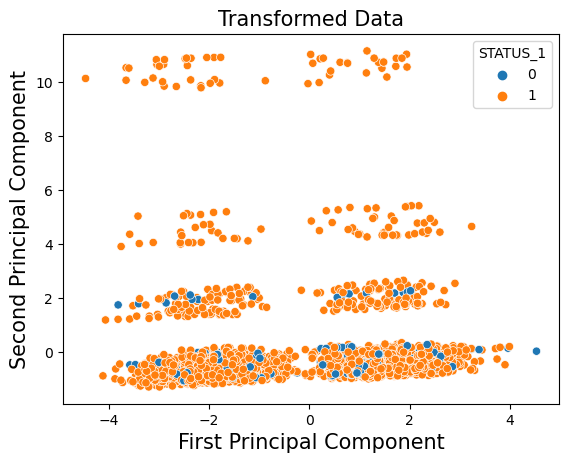

In [456]:
## Q1
pca = PCA(n_components = 2, random_state = 10)
pca_2 = pca.fit_transform(df_scaled)
df_pca_2 = pd.DataFrame(pca_2, columns = ['PC1','PC2'])

## Q2
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca_2, hue = df['STATUS_1'])

plt.title('Transformed Data', fontsize = 15)
plt.xlabel('First Principal Component', fontsize = 15)
plt.ylabel('Second Principal Component', fontsize = 15)
plt.show()

## Q3
We can observe clusters which are occurring. Clusters indicate the correlation  between each other. Hence Variance plays a very important role in determining the number of principal components.

### LDA

In [403]:
## Q1
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=42)

In [401]:
## Q2
lda = LDA(n_components = 1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [402]:
## Q3
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)  
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics
print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))

Accuracy score: 0.9876106194690265
